In [ ]:
import pandas as pd
import numpy as np
import missingno as mn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bitcoin = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data_Set/Criptos_Final.csv")

In [ ]:
bitcoin

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1627541040,29/07/2021 06:44,BTC/USD,40103.92,40116.84,40103.92,40116.84,0.986763,39585.827430
1,1627540980,29/07/2021 06:43,BTC/USD,40091.30,40113.59,40091.30,40113.59,1.216809,48810.566500
2,1627540920,29/07/2021 06:42,BTC/USD,40081.02,40095.09,40081.02,40095.09,0.005650,226.537259
3,1627540860,29/07/2021 06:41,BTC/USD,40083.62,40083.62,40066.52,40067.52,0.045100,1807.045152
4,1627540800,29/07/2021 06:40,BTC/USD,40119.21,40119.21,40063.90,40083.12,0.912236,36565.283490
...,...,...,...,...,...,...,...,...,...
301359,1609459500,01/01/2021 00:05,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
301360,1609459440,01/01/2021 00:04,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959430
301361,1609459380,01/01/2021 00:03,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382390
301362,1609459320,01/01/2021 00:02,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499280


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301364 entries, 0 to 301363
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   unix        301364 non-null  int64  
 1   date        301364 non-null  object 
 2   symbol      301364 non-null  object 
 3   open        301364 non-null  float64
 4   high        301364 non-null  float64
 5   low         301364 non-null  float64
 6   close       301364 non-null  float64
 7   Volume BTC  301364 non-null  float64
 8   Volume USD  301364 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 20.7+ MB


In [ ]:
bitcoin.iloc[:,0]

0         1627541040
1         1627540980
2         1627540920
3         1627540860
4         1627540800
             ...    
301359    1609459500
301360    1609459440
301361    1609459380
301362    1609459320
301363    1609459260
Name: unix, Length: 301364, dtype: int64

In [ ]:
bitcoin.head(5)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1627541040,29/07/2021 06:44,BTC/USD,40103.92,40116.84,40103.92,40116.84,0.986763,39585.827430
1,1627540980,29/07/2021 06:43,BTC/USD,40091.30,40113.59,40091.30,40113.59,1.216809,48810.566500
2,1627540920,29/07/2021 06:42,BTC/USD,40081.02,40095.09,40081.02,40095.09,0.005650,226.537259
3,1627540860,29/07/2021 06:41,BTC/USD,40083.62,40083.62,40066.52,40067.52,0.045100,1807.045152
4,1627540800,29/07/2021 06:40,BTC/USD,40119.21,40119.21,40063.90,40083.12,0.912236,36565.283490


In [ ]:
bitcoin['date']

0         29/07/2021 06:44
1         29/07/2021 06:43
2         29/07/2021 06:42
3         29/07/2021 06:41
4         29/07/2021 06:40
                ...       
301359    01/01/2021 00:05
301360    01/01/2021 00:04
301361    01/01/2021 00:03
301362    01/01/2021 00:02
301363    01/01/2021 00:01
Name: date, Length: 301364, dtype: object

In [ ]:
bitcoin.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,3.013640e+05,301364.000000,301364.000000,301364.000000,301364.000000,301364.000000,3.013640e+05
mean,1.618500e+09,44196.180356,44229.851678,44162.273156,44196.595487,4.719228,1.993595e+05
std,5.219786e+06,10240.873652,10243.233976,10238.613285,10241.131062,10.032281,4.052651e+05
min,1.609459e+09,28093.810000,28397.520000,27734.000000,28073.030000,0.000000,0.000000e+00
25%,1.613980e+09,34650.880000,34677.150000,34624.065000,34650.935000,0.618613,2.691589e+04
50%,1.618500e+09,40068.560000,40102.275000,40030.700000,40068.490000,1.804352,7.896092e+04
75%,1.623021e+09,54980.000000,55013.247500,54943.920000,54980.777500,4.737302,2.060429e+05
max,1.627541e+09,64842.860000,64895.220000,64731.250000,64859.300000,398.565948,1.396792e+07


In [ ]:
bitcoin.columns

Index(['unix', 'date', 'symbol', 'open', 'high', 'low', 'close', 'Volume BTC',
       'Volume USD'],
      dtype='object')

In [ ]:
pd.to_datetime(bitcoin['date'])

0        2021-07-29 06:44:00
1        2021-07-29 06:43:00
2        2021-07-29 06:42:00
3        2021-07-29 06:41:00
4        2021-07-29 06:40:00
                 ...        
301359   2021-01-01 00:05:00
301360   2021-01-01 00:04:00
301361   2021-01-01 00:03:00
301362   2021-01-01 00:02:00
301363   2021-01-01 00:01:00
Name: date, Length: 301364, dtype: datetime64[ns]

In [ ]:
bitcoin

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1627541040,29/07/2021 06:44,BTC/USD,40103.92,40116.84,40103.92,40116.84,0.986763,39585.827430
1,1627540980,29/07/2021 06:43,BTC/USD,40091.30,40113.59,40091.30,40113.59,1.216809,48810.566500
2,1627540920,29/07/2021 06:42,BTC/USD,40081.02,40095.09,40081.02,40095.09,0.005650,226.537259
3,1627540860,29/07/2021 06:41,BTC/USD,40083.62,40083.62,40066.52,40067.52,0.045100,1807.045152
4,1627540800,29/07/2021 06:40,BTC/USD,40119.21,40119.21,40063.90,40083.12,0.912236,36565.283490
...,...,...,...,...,...,...,...,...,...
301359,1609459500,01/01/2021 00:05,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250
301360,1609459440,01/01/2021 00:04,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959430
301361,1609459380,01/01/2021 00:03,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382390
301362,1609459320,01/01/2021 00:02,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499280


In [ ]:
bitcoin.head(10000)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1627541040,29/07/2021 06:44,BTC/USD,40103.92,40116.84,40103.92,40116.84,0.986763,39585.827430
1,1627540980,29/07/2021 06:43,BTC/USD,40091.30,40113.59,40091.30,40113.59,1.216809,48810.566500
2,1627540920,29/07/2021 06:42,BTC/USD,40081.02,40095.09,40081.02,40095.09,0.005650,226.537259
3,1627540860,29/07/2021 06:41,BTC/USD,40083.62,40083.62,40066.52,40067.52,0.045100,1807.045152
4,1627540800,29/07/2021 06:40,BTC/USD,40119.21,40119.21,40063.90,40083.12,0.912236,36565.283490
...,...,...,...,...,...,...,...,...,...
9995,1626941340,22/07/2021 08:09,BTC/USD,32091.81,32094.11,32087.78,32091.44,0.098418,3158.378551
9996,1626941280,22/07/2021 08:08,BTC/USD,32108.71,32108.75,32108.71,32108.75,0.011240,360.902350
9997,1626941220,22/07/2021 08:07,BTC/USD,32098.33,32128.42,32098.33,32128.42,6.237688,200407.057600
9998,1626941160,22/07/2021 08:06,BTC/USD,32103.48,32103.48,32103.48,32103.48,0.016000,513.655680


In [ ]:
bitcoin['date'] == "22/06/2021 00:01"

0         False
1         False
2         False
3         False
4         False
          ...  
301359    False
301360    False
301361    False
301362    False
301363    False
Name: date, Length: 301364, dtype: bool

In [ ]:
bitcoin[bitcoin['date'] == "22/06/2021 00:01"]

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
53683,1624320060,22/06/2021 00:01,BTC/USD,31677.98,31677.98,31500.0,31500.0,7.688911,242200.6896


In [ ]:
len(bitcoin)

301364

In [ ]:
bitcoin.iloc[0:53683]

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1627541040,29/07/2021 06:44,BTC/USD,40103.92,40116.84,40103.92,40116.84,0.986763,39585.827430
1,1627540980,29/07/2021 06:43,BTC/USD,40091.30,40113.59,40091.30,40113.59,1.216809,48810.566500
2,1627540920,29/07/2021 06:42,BTC/USD,40081.02,40095.09,40081.02,40095.09,0.005650,226.537259
3,1627540860,29/07/2021 06:41,BTC/USD,40083.62,40083.62,40066.52,40067.52,0.045100,1807.045152
4,1627540800,29/07/2021 06:40,BTC/USD,40119.21,40119.21,40063.90,40083.12,0.912236,36565.283490
...,...,...,...,...,...,...,...,...,...
53678,1624320360,22/06/2021 00:06,BTC/USD,31845.46,31860.71,31756.93,31809.87,4.029411,128175.041400
53679,1624320300,22/06/2021 00:05,BTC/USD,31490.53,31839.39,31445.28,31836.70,10.049159,319932.057800
53680,1624320240,22/06/2021 00:04,BTC/USD,31401.00,31528.41,31401.00,31528.41,1.221274,38504.828660
53681,1624320180,22/06/2021 00:03,BTC/USD,31499.80,31501.67,31407.34,31446.78,0.676426,21271.409230


In [ ]:
bitcoin_jun_jul = bitcoin.iloc[0:53683]

In [ ]:
bitcoin_jun_jul

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1627541040,29/07/2021 06:44,BTC/USD,40103.92,40116.84,40103.92,40116.84,0.986763,39585.827430
1,1627540980,29/07/2021 06:43,BTC/USD,40091.30,40113.59,40091.30,40113.59,1.216809,48810.566500
2,1627540920,29/07/2021 06:42,BTC/USD,40081.02,40095.09,40081.02,40095.09,0.005650,226.537259
3,1627540860,29/07/2021 06:41,BTC/USD,40083.62,40083.62,40066.52,40067.52,0.045100,1807.045152
4,1627540800,29/07/2021 06:40,BTC/USD,40119.21,40119.21,40063.90,40083.12,0.912236,36565.283490
...,...,...,...,...,...,...,...,...,...
53678,1624320360,22/06/2021 00:06,BTC/USD,31845.46,31860.71,31756.93,31809.87,4.029411,128175.041400
53679,1624320300,22/06/2021 00:05,BTC/USD,31490.53,31839.39,31445.28,31836.70,10.049159,319932.057800
53680,1624320240,22/06/2021 00:04,BTC/USD,31401.00,31528.41,31401.00,31528.41,1.221274,38504.828660
53681,1624320180,22/06/2021 00:03,BTC/USD,31499.80,31501.67,31407.34,31446.78,0.676426,21271.409230


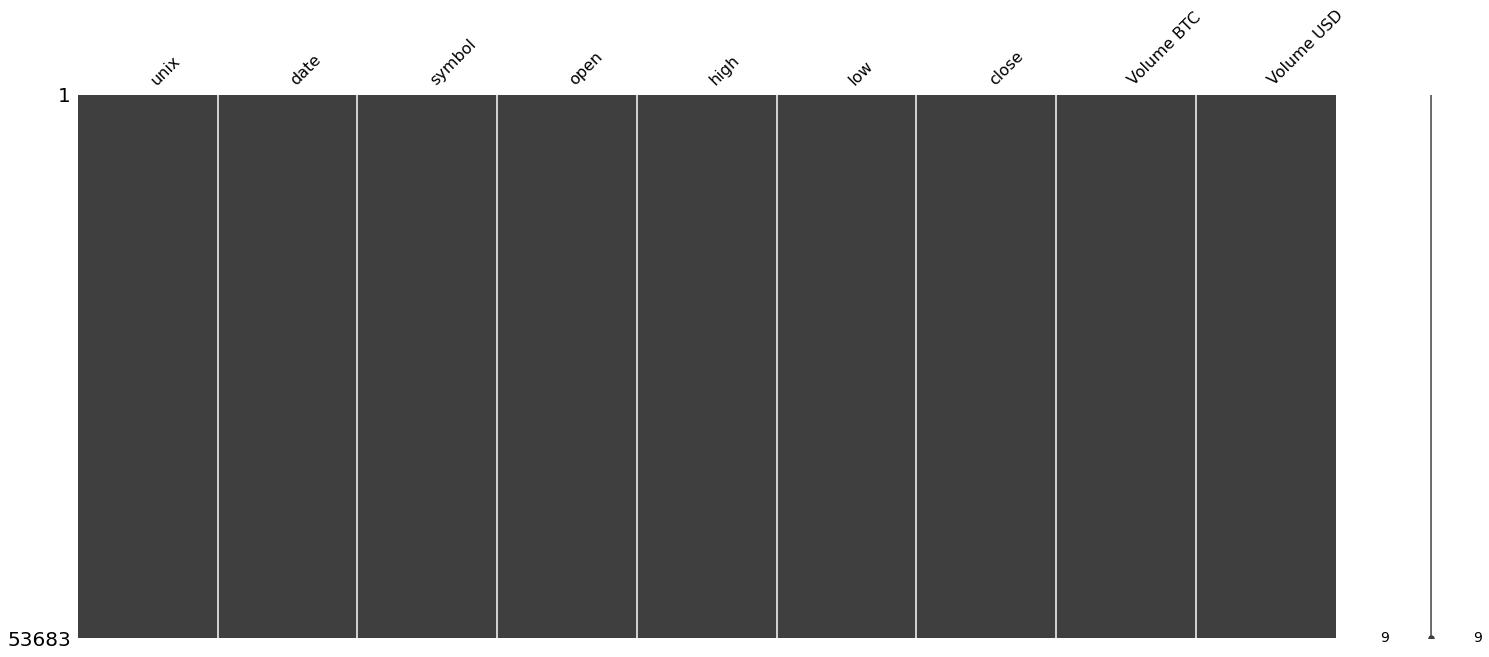

In [ ]:
mn.matrix(bitcoin_jun_jul)

In [ ]:
bitcoin_jun_jul.to_csv("/content/drive/MyDrive/Colab Notebooks/Data_Set/BicoinJunJul.csv", index = False)

In [ ]:
bitcoin.iloc[53684:107368]

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
53684,1624320000,22/06/2021 00:00,BTC/USD,31628.83,31742.42,31608.61,31742.42,7.680285,243790.81850
53685,1624319940,21/06/2021 23:59,BTC/USD,31686.38,31737.80,31634.16,31634.16,2.886719,91318.93420
53686,1624319880,21/06/2021 23:58,BTC/USD,31615.75,31737.94,31615.75,31702.63,0.631966,20034.98078
53687,1624319820,21/06/2021 23:57,BTC/USD,31588.00,31646.00,31555.79,31639.80,0.940118,29745.13537
53688,1624319760,21/06/2021 23:56,BTC/USD,31607.22,31607.22,31573.70,31591.21,0.319901,10106.05714
...,...,...,...,...,...,...,...,...,...
107363,1621099260,15/05/2021 17:21,BTC/USD,47590.13,47774.83,47567.06,47758.49,16.634155,794422.11710
107364,1621099200,15/05/2021 17:20,BTC/USD,47657.77,47659.98,47546.13,47610.94,3.961978,188633.47590
107365,1621099140,15/05/2021 17:19,BTC/USD,47631.80,47699.38,47628.08,47669.33,1.228089,58542.17171
107366,1621099080,15/05/2021 17:18,BTC/USD,47543.66,47631.80,47525.32,47631.80,1.322295,62983.26812


In [ ]:
bitcoin_May_Jun = bitcoin.iloc[53684:107368]

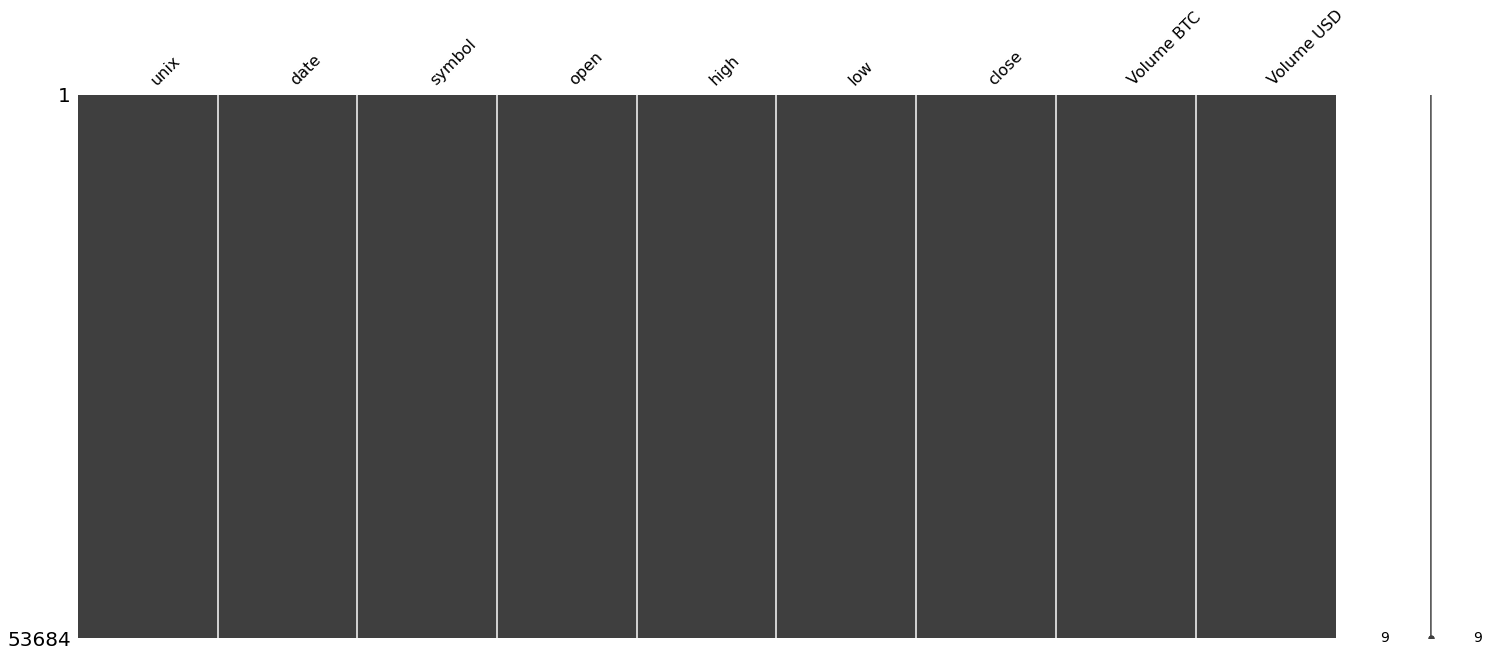

In [ ]:
mn.matrix(bitcoin_May_Jun)

In [ ]:
bitcoin_May_Jun.to_csv("/content/drive/MyDrive/Colab Notebooks/Data_Set/BicoinMayJun.csv", index = False)